# DSCI 503 - Project 04

### Daniel Carter

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

## Part 1: Loading the Dataset; Preliminary Analysis

In this section we will load the data for the project and perfom some analysis to help understand the data better

In [2]:
fc = pd.read_csv('forest_cover.txt', sep='\t')
fc.head(5)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area,Soil_Type,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,Rawah,29,5
1,2590,56,2,212,-6,390,220,235,151,6225,Rawah,29,5
2,2804,139,9,268,65,3180,234,238,135,6121,Rawah,12,2
3,2785,155,18,242,118,3090,238,238,122,6211,Rawah,30,2
4,2595,45,2,153,-1,391,220,234,150,6172,Rawah,29,5


Going to examine the size of the data

In [3]:
fc.shape

(15120, 13)

We will now inspect the distribution of cover types

In [4]:
fc['Cover_Type'].value_counts().sort_index()

1    2160
2    2160
3    2160
4    2160
5    2160
6    2160
7    2160
Name: Cover_Type, dtype: int64

Going to create a list of seven colors to be used for the visuals

In [5]:
palette = ['orchid', 'lightcoral', 'orange', 'gold', 'lightgreen', 'deepskyblue', 'cornflowerblue']

## Part 2: Distribution of Cover Type by Wilderness Area

In this section we will explore the relationship between cover type and wilderness area. We will start by determining the distribution of the wilderness areas within our dataset

In [6]:
fc['Wilderness_Area'].value_counts().sort_index()

Cache la Poudre    4675
Comanche Peak      6349
Neota               499
Rawah              3597
Name: Wilderness_Area, dtype: int64

Create a dataframe to determine how many regions of each cover type are in each of the 4 wilderness areas

In [7]:
ct_by_wa = pd.crosstab(fc['Cover_Type'], fc['Wilderness_Area'])
ct_by_wa

Wilderness_Area,Cache la Poudre,Comanche Peak,Neota,Rawah
Cover_Type,,,,
1,0,917,181,1062
2,20,940,66,1134
3,1297,863,0,0
4,2160,0,0,0
5,0,1304,0,856
6,1198,962,0,0
7,0,1363,252,545


We will now visually represent the information in the Dataframe in a stacked bar chart

<Figure size 576x288 with 0 Axes>

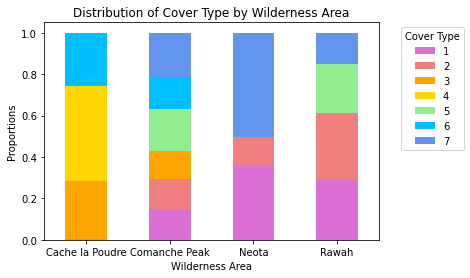

In [8]:
ct_by_wa_props = ct_by_wa/np.sum(ct_by_wa)
bb = np.cumsum(ct_by_wa_props) - ct_by_wa_props
plt.figure(figsize=[8,4])
transposed_df = ct_by_wa_props.T
transposed_df.plot(kind='bar', stacked=True, color=palette, rot=0, title='Distribution of Cover Type by Wilderness Area', xlabel='Wilderness Area', ylabel='Proportions')
plt.legend(loc='upper left', bbox_to_anchor=(1.05,1), title='Cover Type')
plt.show()

## Part 3: Distribution of Cover Type by Soil Type

Explore the relationship between cover type and soil type. Start by creating a dataframe to determine number of cover types per soil type

In [9]:
ct_by_st = pd.crosstab(fc['Cover_Type'], fc['Soil_Type'])
ct_by_st

Soil_Type,1,2,3,4,5,6,8,9,10,11,...,31,32,33,34,35,36,37,38,39,40
Cover_Type,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,5,0,0,0,1,9,5,...,114,230,184,0,3,0,0,80,79,49
2,0,3,12,20,0,7,1,9,81,67,...,97,255,184,12,1,2,0,7,3,3
3,121,283,133,462,55,248,0,0,717,89,...,0,5,0,0,0,0,0,0,0,0
4,139,94,799,133,39,244,0,0,170,24,...,0,0,0,0,0,0,0,0,0,0
5,0,61,0,129,0,0,0,0,64,154,...,87,100,115,4,0,0,0,0,0,0
6,95,182,18,87,71,151,0,0,1101,67,...,7,30,66,2,0,0,0,0,0,0
7,0,0,0,7,0,0,0,0,0,0,...,27,70,67,4,98,8,34,641,575,407


Visually represent dataframe just created in a stacked bar chart

<Figure size 864x432 with 0 Axes>

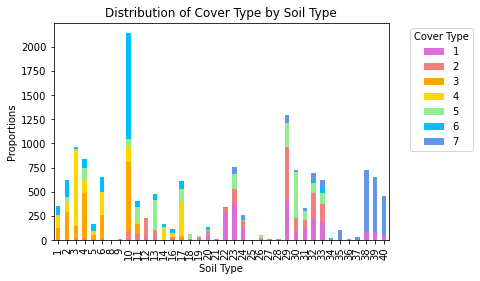

In [10]:
plt.figure(figsize=[12,6])
transposed_df = ct_by_st.T
transposed_df.plot(kind='bar', stacked=True, color=palette, title='Distribution of Cover Type by Soil Type', xlabel='Soil Type', ylabel='Proportions')
plt.legend(loc='upper left', bbox_to_anchor=(1.05,1), title='Cover Type')
plt.show()

## Part 4: Distribution of Elevation by Cover Type

In this section we will be exploring the relationship between cover type and elevation. We will start by calculating the average elevation for each of the seven cover types

In [11]:
elevation_grouped = fc.filter(items=['Elevation', 'Cover_Type']).groupby('Cover_Type').mean('Elevation').reset_index()
elevation_grouped

,Cover_Type,Elevation
0,1,3128.025926
1,2,2922.540278
2,3,2398.423148
3,4,2223.420370
4,5,2786.801389
5,6,2423.276852
6,7,3362.769907


Create histograms to visually explore the distribution of elevations for each of the seven cover types

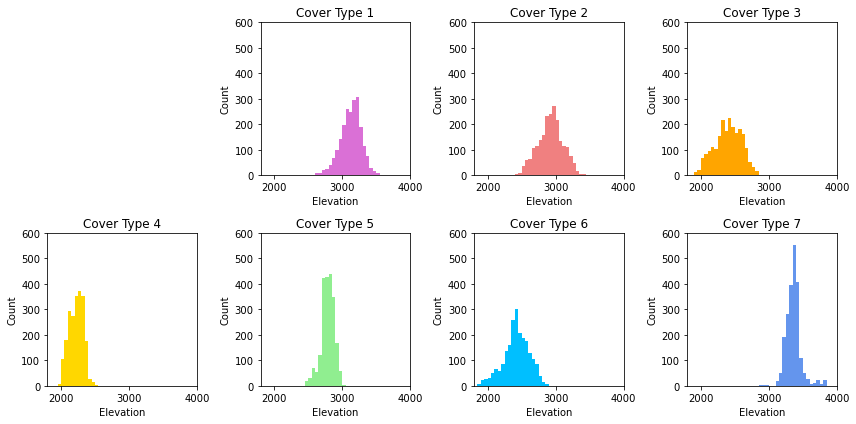

In [12]:
plt.figure(figsize=[12,6])
for i in fc['Cover_Type'].sort_values().unique():
    plt.subplot(2,4,i+1)
    plt.hist(np.where(fc['Cover_Type'] == i, fc['Elevation'], 0), bins=np.arange(1800,4050,50), color=palette[i-1])
    plt.title(f'Cover Type {i}')
    plt.xlim([1800,4000])
    plt.ylim([0,600])
    plt.xlabel('Elevation')
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

## Part 5: Creating Training, Validation, and Test Sets

In this section we will be splitting our data into the appropriate subsections to train and test our model. We will start by separating the categorical features, the numerical features, and the labels

In [13]:
X_num = fc.select_dtypes(include=np.number).drop(columns=['Cover_Type', 'Soil_Type'])
X_cat = fc.drop(columns=X_num.columns).drop(columns=['Cover_Type'])
X_num = X_num.values
X_cat = X_cat.values
y = fc['Cover_Type'].values

print(f'Numerical Feature Array Shape: {X_num.shape}')
print(f'Categorical Feature Array Shape: {X_cat.shape}')
print(f'Label Array Shape: {y.shape}')

Numerical Feature Array Shape: (15120, 10)
Categorical Feature Array Shape: (15120, 2)
Label Array Shape: (15120,)


We will now encode the categorical columns

In [14]:
oh_encoder = OneHotEncoder(sparse=False)
oh_encoder.fit(X_cat)
X_enc = oh_encoder.transform(X_cat)

print(f'Encoded Feature Array Shape: {X_enc.shape}')

Encoded Feature Array Shape: (15120, 42)


Combine numerical and categorical data together

In [15]:
X = np.hstack([X_num, X_enc])

print(f'Feature Array Shape: {X.shape}')

Feature Array Shape: (15120, 52)


In [16]:
X_train, X_hold, y_train, y_hold = train_test_split(X, y, test_size=.3, random_state=1, stratify=y)
print(X_hold.shape)
print(y_hold.shape)
X_valid, X_test, y_valid, y_test = train_test_split(X_hold, y_hold, test_size=.5, random_state=1, stratify=y)

(4536, 52)
(4536,)


ValueError: Found input variables with inconsistent numbers of samples: [4536, 15120]

I do not understand why this is erroring out because the X_hold and y_hold are the same length. Moving on with no validation set

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1, stratify=y)

print(f'Training Feature Shape: {X_train.shape}')
print(f'Testing Feature Shape: {X_test.shape}')

Training Feature Shape: (12096, 52)
Testing Feature Shape: (3024, 52)


## Part 6: Logistic Regression Model

In this section we will create and evaluate a Logistics regression model

In [18]:
lr_mod = LogisticRegression(solver='lbfgs', max_iter=1000, multi_class='multinomial', penalty='none')
lr_mod.fit(X_train, y_train)
print(f'Training Accuracy: {np.round(lr_mod.score(X_train, y_train),4)}')

Training Accuracy: 0.6112


C:\Anaconda\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## Part 7: Decision Tree Models

We will create and evaluate several decision tree models

In [19]:
dt_train_acc = []
depth_range = range(2,30)

for i in depth_range:
    np.random.seed(1)
    temp_tree = DecisionTreeClassifier(max_depth=i)
    temp_tree.fit(X_train, y_train)
    dt_train_acc.append(temp_tree.score(X_train, y_train))
    
dt_idx = np.argmax(dt_train_acc)
dt_opt_depth = depth_range[dt_idx]
print(f'Optimal value for max_depth: {dt_opt_depth}')
print(f'Training Accuracy for Optimal Model: {np.round(dt_train_acc[dt_idx], 4)}')

Optimal value for max_depth: 29
Training Accuracy for Optimal Model: 0.9994


Going to plot the training curves as a function

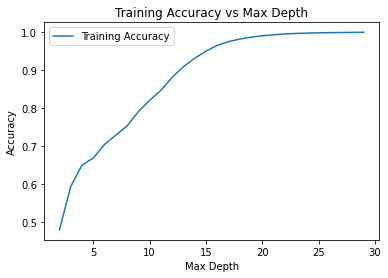

In [20]:
plt.plot(depth_range, dt_train_acc, label='Training Accuracy')
plt.title('Training Accuracy vs Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Part 8: Random Forrest Models

In this section we will create and evaluate several random forrest models

In [21]:
df_train_acc = []

for i in depth_range:
    np.random.seed(1)
    temp_forrest = RandomForestClassifier(max_depth=i, n_estimators=100)
    temp_forrest.fit(X_train, y_train)
    df_train_acc.append(temp_forrest.score(X_train, y_train))
rf_idx = np.argmax(df_train_acc)
rf_opt_depth = depth_range[rf_idx]

print(f'Optimal value for max depth: {rf_opt_depth}')
print(f'Training Accuracy for Optimal Model: {np.round(df_train_acc[rf_idx], 4)}')

Optimal value for max depth: 26
Training Accuracy for Optimal Model: 1.0


Plot training curves as a function of max depth

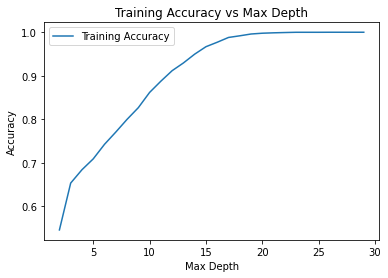

In [22]:
plt.plot(depth_range, df_train_acc, label='Training Accuracy')
plt.title('Training Accuracy vs Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Part 9: Create and Evaluate Final Model

In this section we will select our final model and evaluate it on the test set. Due to the error I got I have to go with the training data results and so I will be choosing the Random Forrest model with a max depth of 26

In [23]:
np.random.seed(1)

final_model = RandomForestClassifier(max_depth=26, n_estimators=100)
final_model.fit(X_train, y_train)

print(f'Training Accuracy for Final Model: {np.round(final_model.score(X_train, y_train), 4)}')
print(f'Testing Accuracy for Final Model: {np.round(final_model.score(X_test, y_test), 4)}')

Training Accuracy for Final Model: 1.0
Testing Accuracy for Final Model: 0.8664


Will now create a confustion matrix to show the models performance

In [24]:
test_pred = final_model.predict(X_test)

cm = confusion_matrix(y_test, test_pred)

cm_df = pd.DataFrame(cm, columns=['1','2','3','4','5','6','7'])
cm_df

,1,2,3,4,5,6,7
0,327,74,2,0,8,1,20
1,76,304,10,0,30,10,2
2,0,2,359,23,3,45,0
3,0,0,6,423,0,3,0
4,1,13,6,0,408,4,0
5,1,0,41,12,2,376,0
6,9,0,0,0,0,0,423


In [25]:
cr = classification_report(y_test, test_pred)
print(cr)

              precision    recall  f1-score   support

           1       0.79      0.76      0.77       432
           2       0.77      0.70      0.74       432
           3       0.85      0.83      0.84       432
           4       0.92      0.98      0.95       432
           5       0.90      0.94      0.92       432
           6       0.86      0.87      0.86       432
           7       0.95      0.98      0.96       432

    accuracy                           0.87      3024
   macro avg       0.86      0.87      0.86      3024
weighted avg       0.86      0.87      0.86      3024

